# Post-Covid19 Survival Kit for Airbnb Hosts

## Dinis Oliveira Costa | Data Part-time Dec 2019

In [1]:
# Add small description of the goal of the project
# Add Airbnb logo and Ironhack logo

In [2]:
# Data colected:

# calendar
# detailed_listings
# sum_listings
# reviews
# neighbourhoods w/ geo location

# Data missing:
# Idealista - ADD DATA FROM IDEALISTA BOOKMARK
# 

# NLP reviews  - sentiment analysis 


In [3]:
# Data Processing
import pandas as pd
import numpy as np
import scipy

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import geopandas as gpd



plt.rcParams["figure.figsize"] = (26,6)
plt.style.use('fivethirtyeight')

# Misc libraries
import random
import time

# Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, HuberRegressor

# Boost
# import xgboost as xgb

# Ensemble (if used try GradientBoostingRegressor)
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesClassifier

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# TargetEnconding vs OneHot Enconding

In [4]:
# Detailed Calendar Data for listings in Barcelona
calendar = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/calendar.csv')

In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,513825,2020-05-11,f,$150.00,$135.00,2.0,365.0
1,515230,2020-05-12,f,$44.00,$44.00,90.0,1125.0
2,515230,2020-05-13,f,$44.00,$44.00,90.0,1125.0
3,515230,2020-05-14,f,$44.00,$44.00,90.0,1125.0
4,515230,2020-05-15,f,$44.00,$44.00,90.0,1125.0


In [6]:
# Detailed Listings data for Barcelona
detailed_listings = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/detailed_listings.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Summary information and metrics for listings in Barcelona (good for visualisations)
sum_listings = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/summary_listings.csv')

In [11]:
# Detailed Calendar Data for listings in Barcelona
calendar = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/calendar.csv')

In [13]:
# Detailed Review Data for listings in Barcelona
reviews = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/reviews.csv')

In [15]:
# Neighbourhood list for geo filter. Sourced from city or open source GIS files.
neighbourhoods = pd.read_csv('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/neighbourhoods.csv')

In [17]:
# GeoJSON file of neighbourhoods of the city
neighbourhoods_geo = pd.read_json('/Users/Dinis/Ironhack/Projects/airbnb_final_project/data/neighbourhoods.geojson')

In [246]:
#TO-DO DATA WRANGLING:

#1 Check Outliers - presentation Dani + IQR + Winsorization
#2 Heatmap to check - correlation number_of_reviews w/ reviews_per_monht and availability_365

## 1. Data Wrangling

In [9]:
sum_listings.shape

(20858, 16)

In [21]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329


In [22]:
sum_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
sum_listings.shape

(20858, 16)

In [24]:
# change last_review to numerical? 
sum_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [247]:
# Calculating missing values 

sum_listings.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:

sum_listings['reviews_per_month'].fillna(value=0, inplace=True)

In [27]:
columns = ['id','host_name','last_review']

sum_listings.drop(columns, axis = 1,inplace=True) 

In [28]:
sum_listings = sum_listings.dropna(subset=['name'])

In [29]:
sum_listings.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0.5, 1.0, 'Availability 365')

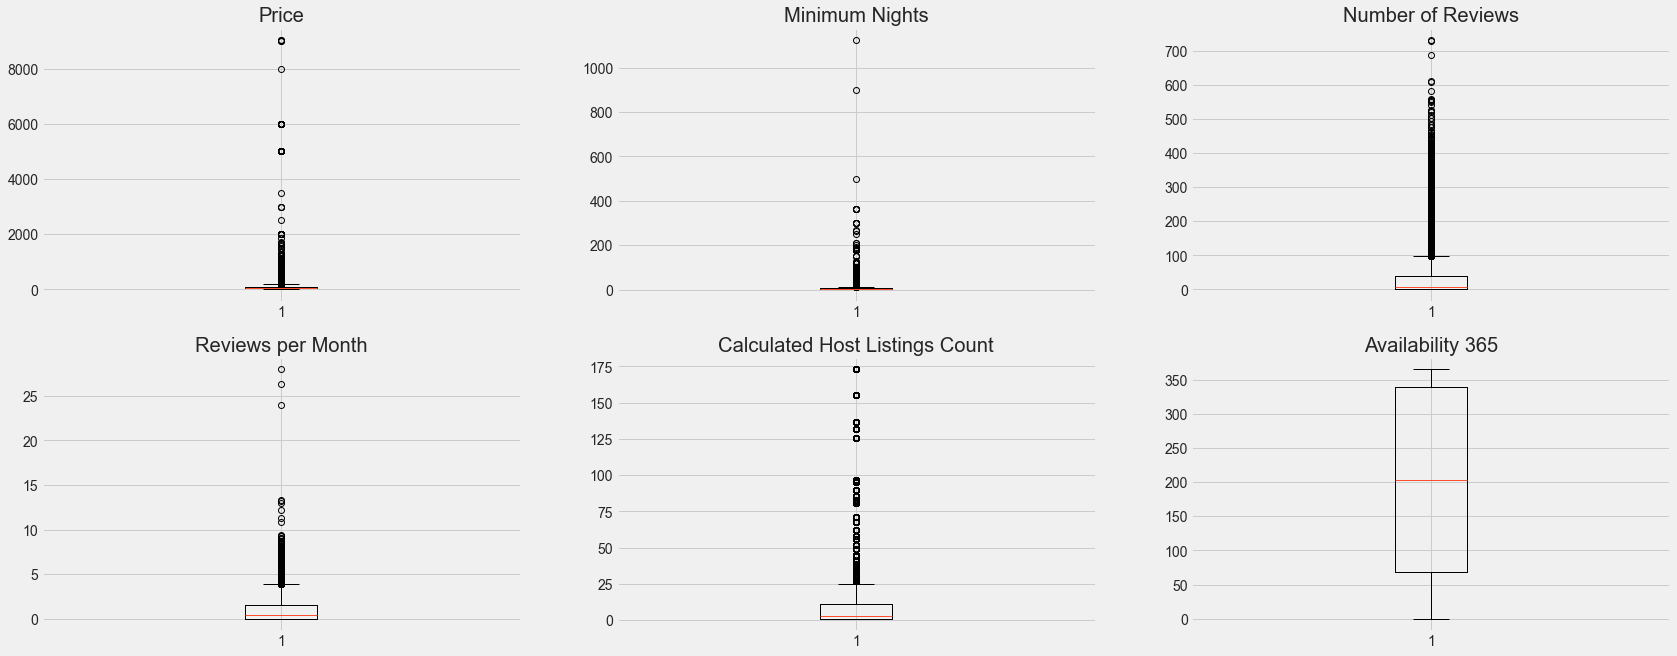

In [251]:
# Plotting boxplots for price, minimum_rights, number_of_reviews, reviews_per_month, calculated_host_listings_count, 
# availability_365

plt.figure(figsize = (26, 16))

ax=plt.subplot(331)
plt.boxplot(sum_listings['price'])
ax.set_title('Price')

ax=plt.subplot(332)
plt.boxplot(sum_listings['minimum_nights'])
ax.set_title('Minimum Nights')

ax=plt.subplot(333)
plt.boxplot(sum_listings['number_of_reviews'])
ax.set_title('Number of Reviews')

ax=plt.subplot(334)
plt.boxplot(sum_listings['reviews_per_month'])
ax.set_title('Reviews per Month')

ax=plt.subplot(335)
plt.boxplot(sum_listings['calculated_host_listings_count'])
ax.set_title('Calculated Host Listings Count')

ax=plt.subplot(336)
plt.boxplot(sum_listings['availability_365'])
ax.set_title('Availability 365')


- Most variables reveal a large number of outliers -  data points that differs significantly from the other observations - which need to be cleaned before interpretating 

In [92]:
# Interquartile range (IQR) method: 
# the interquartile range (IQR), also called the midspread, is a measure of statistical dispersion, 
# being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, 
# IQR = Q3 − Q1.


# Fixing PRICE 
Q1 = sum_listings['price'].quantile(0.25)
Q3 = sum_listings['price'].quantile(0.75)
IQR = Q3 - Q1    
print('IQR Price:', IQR)

# Commonly used rule says that a data point is an outlier if it is more than 1.5 * IQR

filtered_price = (sum_listings['price'] >= Q1 - 1.5 * IQR) & (sum_listings['price'] <= Q3 + 1.5 *IQR)
fp_sum_listings =sum_listings.loc[filtered_price]

IQR Price: 64.0


In [94]:
# Fixing NUMBER OF REVIEWS 
Q1 = fp_sum_listings['number_of_reviews'].quantile(0.25)
Q3 = fp_sum_listings['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
print('IQR Number of Reviews:', IQR)


filtered_reviews = (fp_sum_listings['number_of_reviews'] >= Q1 - 1.5 * IQR) & (fp_sum_listings['number_of_reviews'] <= Q3 + 1.5 *IQR)
fr_sum_listings =fp_sum_listings.loc[filtered_reviews]

IQR Number of Reviews: 40.0


In [95]:
# Fixing REVIEWS PER MONTH
Q1 = fr_sum_listings['reviews_per_month'].quantile(0.25)
Q3 = fr_sum_listings['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
print('IQR Reviews per month:', IQR)

filtered_reviews_per_month = (fr_sum_listings['reviews_per_month'] >= Q1 - 1.5 * IQR) & (fr_sum_listings['reviews_per_month'] <= Q3 + 1.5 *IQR)
clean_sum_listings =fr_sum_listings.loc[filtered_reviews_per_month]

IQR Reviews per month: 1.08


## 2. Data Visualization

### 2.1 Visualization categorical variables

In [39]:
# Visualization categorical variables
# Plot similar variables in the same figure - add function
# neighbourhood_group, neighbourhood_group, room_type

# Visualization numerical variables
# Distribution/Histogram price
# Distribution room_type
# Distribution location
# price, minimum_nights, number_of_reviews, reviews_per_month, 
# calculated_host_listings_count, availability_365

# Heatmap correlation
# Geoplot / Folium 
# Barcelona JSON neighborhoods

# Add comments to plots with conclusions about the data

Text(0.5, 1.0, 'Top 5 Neighbourhood Groups with largest number of listings')

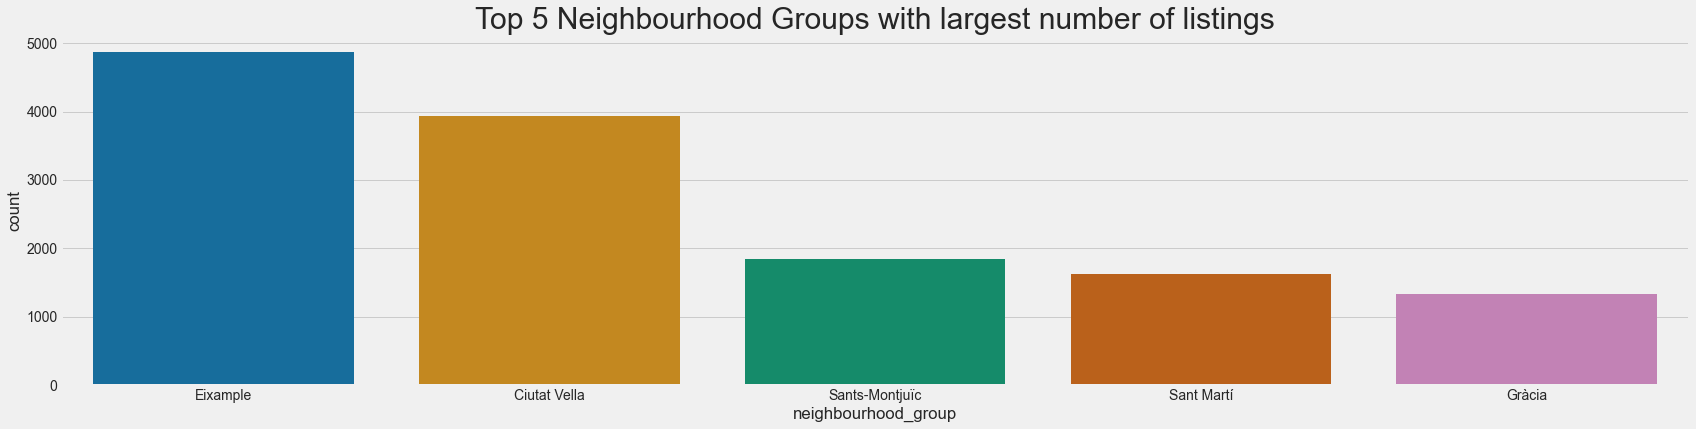

In [139]:
# Plotting the Top 5 Neighbourhood Groups with largest number of listings

ax = sns.countplot(x='neighbourhood_group', data=clean_sum_listings, palette='colorblind', 
              order=clean_sum_listings.neighbourhood_group.value_counts().iloc[:5].index)

ax.set_title(label = 'Top 5 Neighbourhood Groups with largest number of listings', fontsize = 30)

- The majority of Airbnb listings in Barcelona are located in **Eixample**, **Ciutat Vella** and **Sants-Montjuic**

In [210]:
def weight_col(col):

    column_values = list(col.unique())

    for i in column_values:
        listings = len(col[col== i])
        listings_weight = round(listings/len(col)*100,2)
    
        print(f'\n {i}, {listings} listings, {listings_weight}% of Barcelona')

In [212]:
# Calculating the distribution of neighbourhood groups in Barcelona

weight_col(clean_sum_listings['neighbourhood_group'])


 Ciutat Vella, 3942 listings, 25.02% of Barcelona

 Gràcia, 1329 listings, 8.44% of Barcelona

 Eixample, 4873 listings, 30.93% of Barcelona

 Sants-Montjuïc, 1839 listings, 11.67% of Barcelona

 Sant Martí, 1618 listings, 10.27% of Barcelona

 Sarrià-Sant Gervasi, 645 listings, 4.09% of Barcelona

 Horta-Guinardó, 566 listings, 3.59% of Barcelona

 Sant Andreu, 303 listings, 1.92% of Barcelona

 Les Corts, 385 listings, 2.44% of Barcelona

 Nou Barris, 253 listings, 1.61% of Barcelona


- **Eixample** and **Ciutat Vella** account for more than half (55,95%) of the places published online
- Between these two neighbourhoods groups there are almost 9000 listings

Text(0.5, 1.0, 'Top 10 Neighbourhoods with largest number of listings')

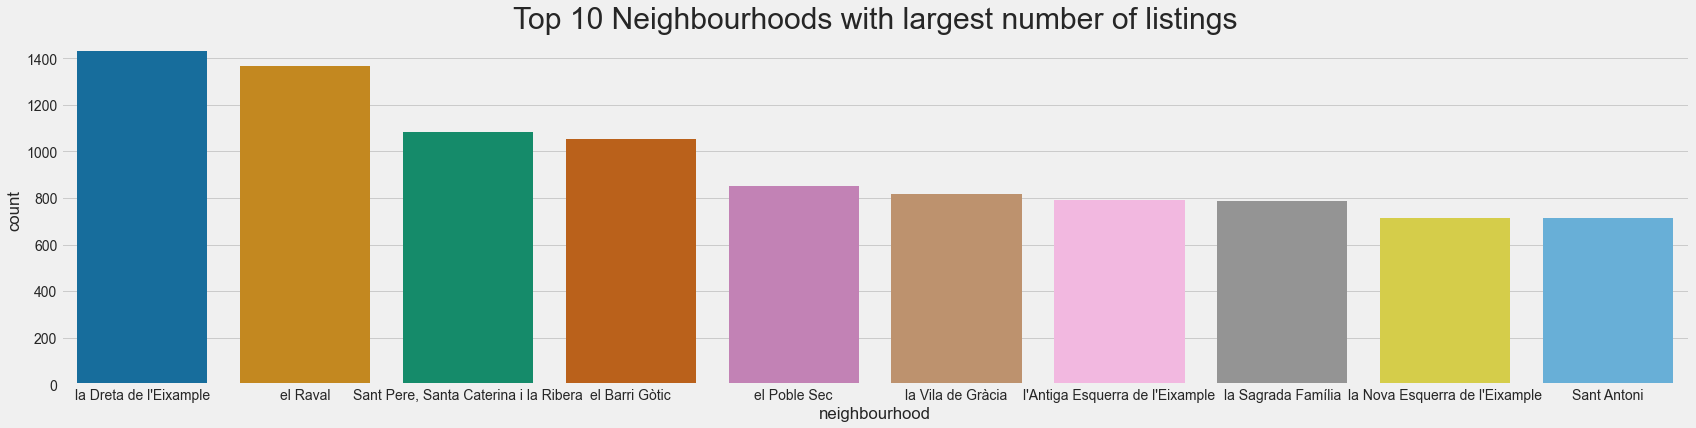

In [141]:
# Plotting the Top 10 Neighbourhoods with the most listings in Barcelona

ax=sns.countplot(x='neighbourhood', data=clean_sum_listings, palette='colorblind', 
                 order=clean_sum_listings.neighbourhood.value_counts().iloc[:10].index)

ax.set_title(label = 'Top 10 Neighbourhoods with largest number of listings', fontsize = 30)

In [252]:
clean_sum_listings.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [215]:
weight_col(clean_sum_listings.neighbourhood)


 el Barri Gòtic, 1054 listings, 6.69% of Barcelona

 el Camp d'en Grassot i Gràcia Nova, 284 listings, 1.8% of Barcelona

 la Barceloneta, 439 listings, 2.79% of Barcelona

 Sant Pere, Santa Caterina i la Ribera, 1082 listings, 6.87% of Barcelona

 la Dreta de l'Eixample, 1431 listings, 9.08% of Barcelona

 l'Antiga Esquerra de l'Eixample, 792 listings, 5.03% of Barcelona

 el Fort Pienc, 432 listings, 2.74% of Barcelona

 el Raval, 1367 listings, 8.68% of Barcelona

 el Poble Sec, 851 listings, 5.4% of Barcelona

 la Sagrada Família, 788 listings, 5.0% of Barcelona

 el Clot, 135 listings, 0.86% of Barcelona

 Vallvidrera, el Tibidabo i les Planes, 20 listings, 0.13% of Barcelona

 Sant Antoni, 714 listings, 4.53% of Barcelona

 el Guinardó, 161 listings, 1.02% of Barcelona

 el Camp de l'Arpa del Clot, 296 listings, 1.88% of Barcelona

 Sant Andreu, 74 listings, 0.47% of Barcelona

 Sants, 313 listings, 1.99% of Barcelona

 Pedralbes, 22 listings, 0.14% of Barcelona

 Diagonal Mar i

- The neighbourhoods of la Dreta de **l'Eixample**, **el Raval**, **Sant Pere, Santa Caterina i la Ribera** concentrate about 25% of all the Airbnb listings available in Barcelona

Text(0.5, 1.0, 'Distribution of listings per type')

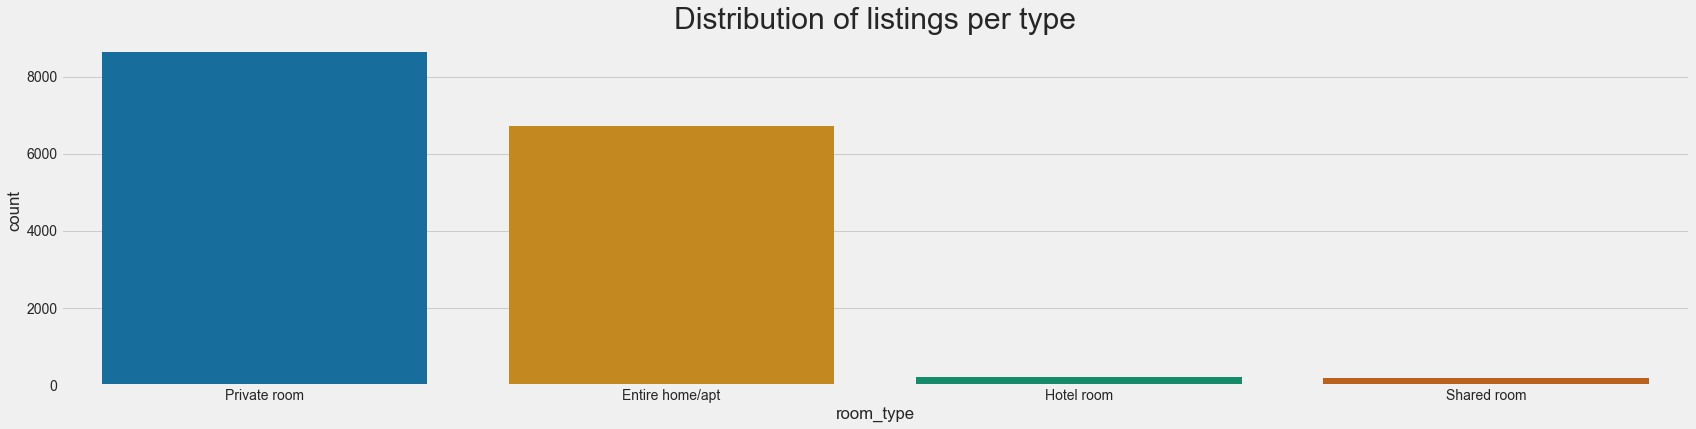

In [143]:
ax=sns.countplot(x='room_type', data=clean_sum_listings, palette='colorblind', 
                 order=clean_sum_listings.room_type.value_counts().iloc[:10].index)

ax.set_title(label = 'Distribution of listings per type', fontsize = 30)

- There's a close distribution between private rooms and entire apartments posted in Barcelona, with almost half and half of each listing type

In [216]:
weight_col(clean_sum_listings.room_type)


 Private room, 8645 listings, 54.88% of Barcelona

 Entire home/apt, 6720 listings, 42.66% of Barcelona

 Hotel room, 196 listings, 1.24% of Barcelona

 Shared room, 192 listings, 1.22% of Barcelona


- Looking at the numerical variables, they all seem to be right skewed distributed except for availabilty
- 

### 2.2 Numerical Variables Visualization

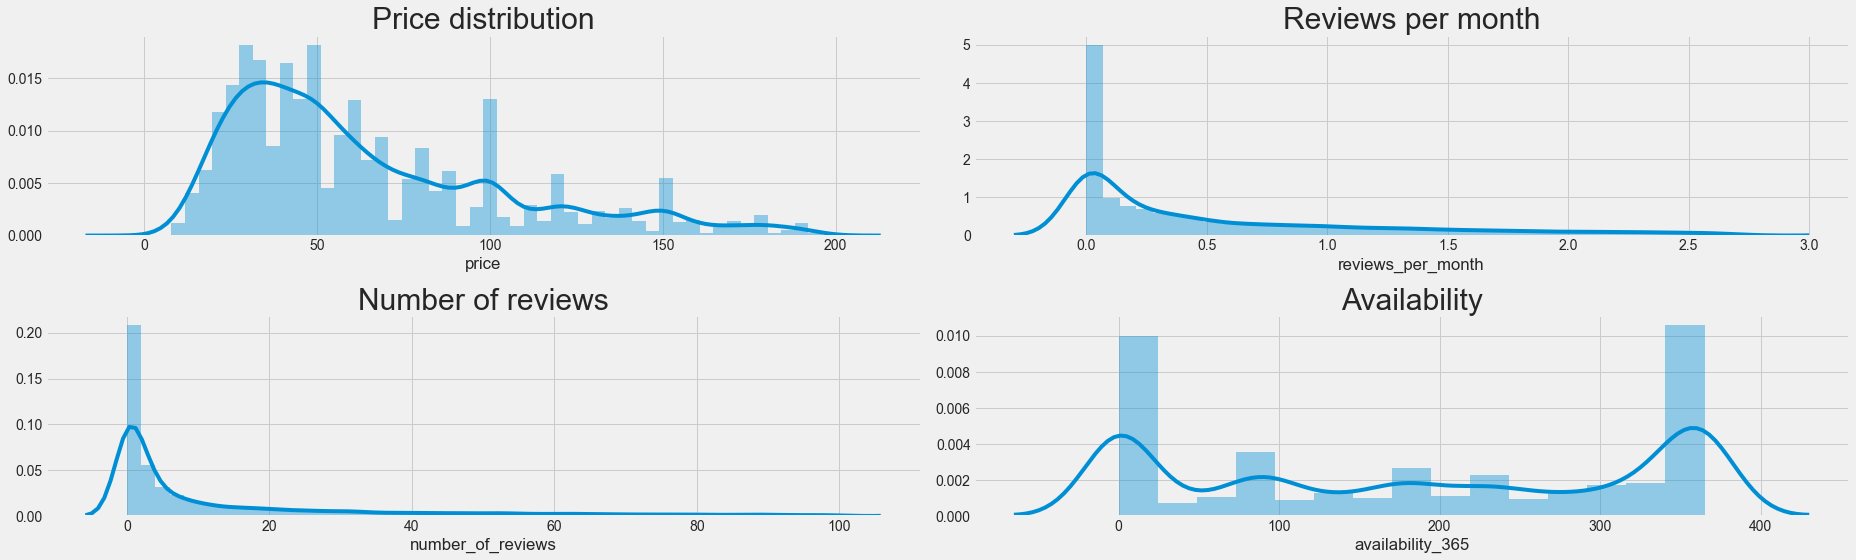

In [236]:
# Plotting price, reviews_per_month, numbers_of_reviews, availability_365

plt.figure(figsize = (26, 8))


plt.subplot(221)
ax1=sns.distplot(clean_sum_listings['price'])
ax1.set_title(label = 'Price distribution', fontsize = 30)
plt.tight_layout()

plt.subplot(222)
ax2=sns.distplot(clean_sum_listings['reviews_per_month'])
ax2.set_title(label = 'Reviews per month', fontsize = 30)
plt.tight_layout()

plt.subplot(223)
ax3=sns.distplot(clean_sum_listings['number_of_reviews'])
ax3.set_title(label = 'Number of reviews', fontsize = 30)
plt.tight_layout()

plt.subplot(224)
ax4=sns.distplot(clean_sum_listings['availability_365'])
ax4.set_title(label = 'Availability', fontsize = 30)
plt.tight_layout()

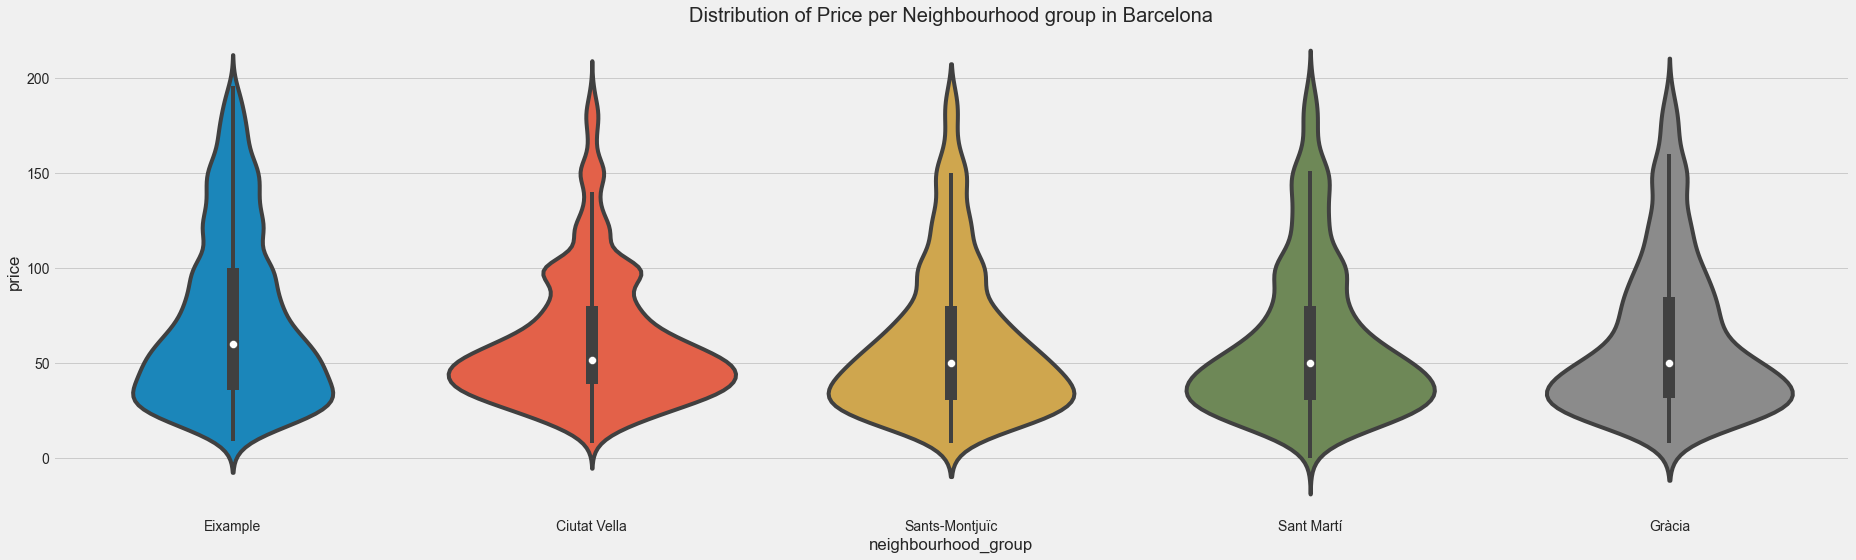

In [271]:
# Plotting Distribution of Price per neighbourhood_group

fig, ax = plt.subplots()
fig.set_size_inches(26, 8)
ax = sns.violinplot(x="neighbourhood_group", y="price", data=clean_sum_listings, order=clean_sum_listings.neighbourhood_group.value_counts().iloc[:5].index);
ax.set_title(label='Distribution of Price per Neighbourhood group in Barcelona', fontsize=20);
plt.tight_layout()

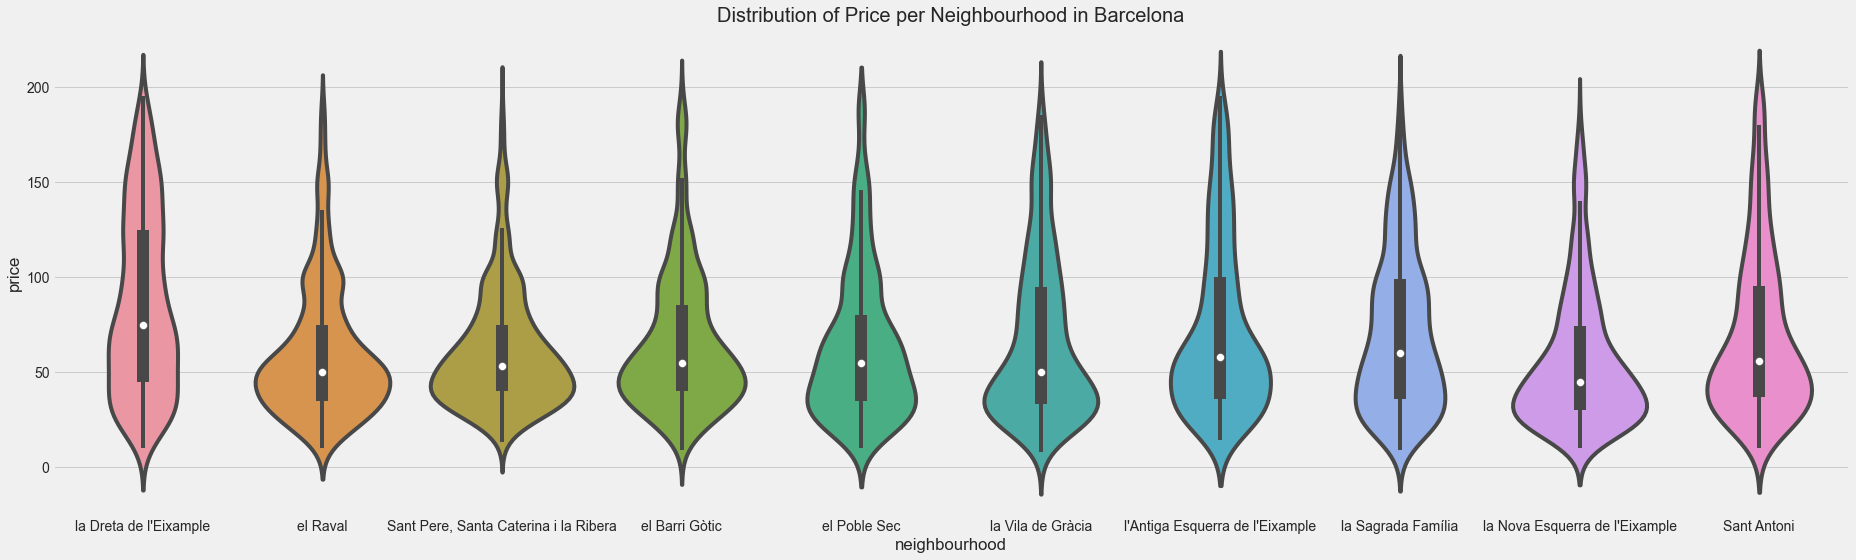

In [272]:
# Plotting Distribution of Price per neighbourhood

fig, ax = plt.subplots()
fig.set_size_inches(26, 8)
ax = sns.violinplot(x="neighbourhood", y="price", data=clean_sum_listings, order=clean_sum_listings.neighbourhood.value_counts().iloc[:10].index);
ax.set_title(label='Distribution of Price per Neighbourhood in Barcelona', fontsize=20);
plt.tight_layout()

Text(0.5, 1.0, 'Most frequent choice for Minimum Nights')

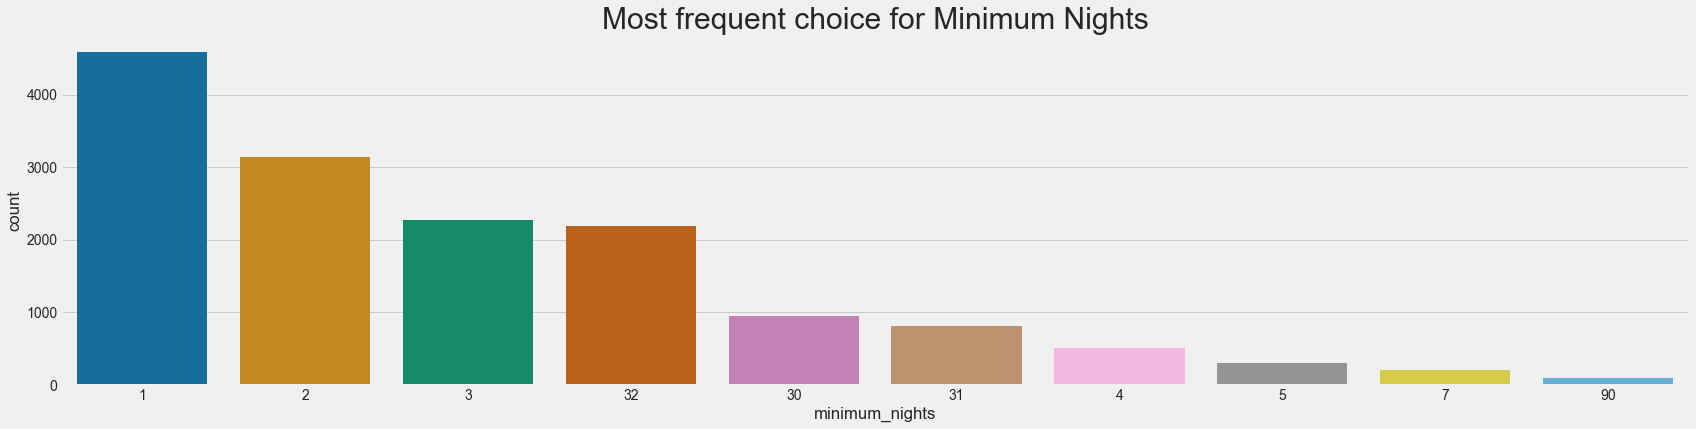

In [119]:
# Plotting Minimum Nights

ax = sns.countplot(x="minimum_nights", data=clean_sum_listings, palette="colorblind", 
                   order=clean_sum_listings.minimum_nights.value_counts().iloc[:10].index)

ax.set_title(label = 'Most frequent choice for Minimum Nights', fontsize = 30)

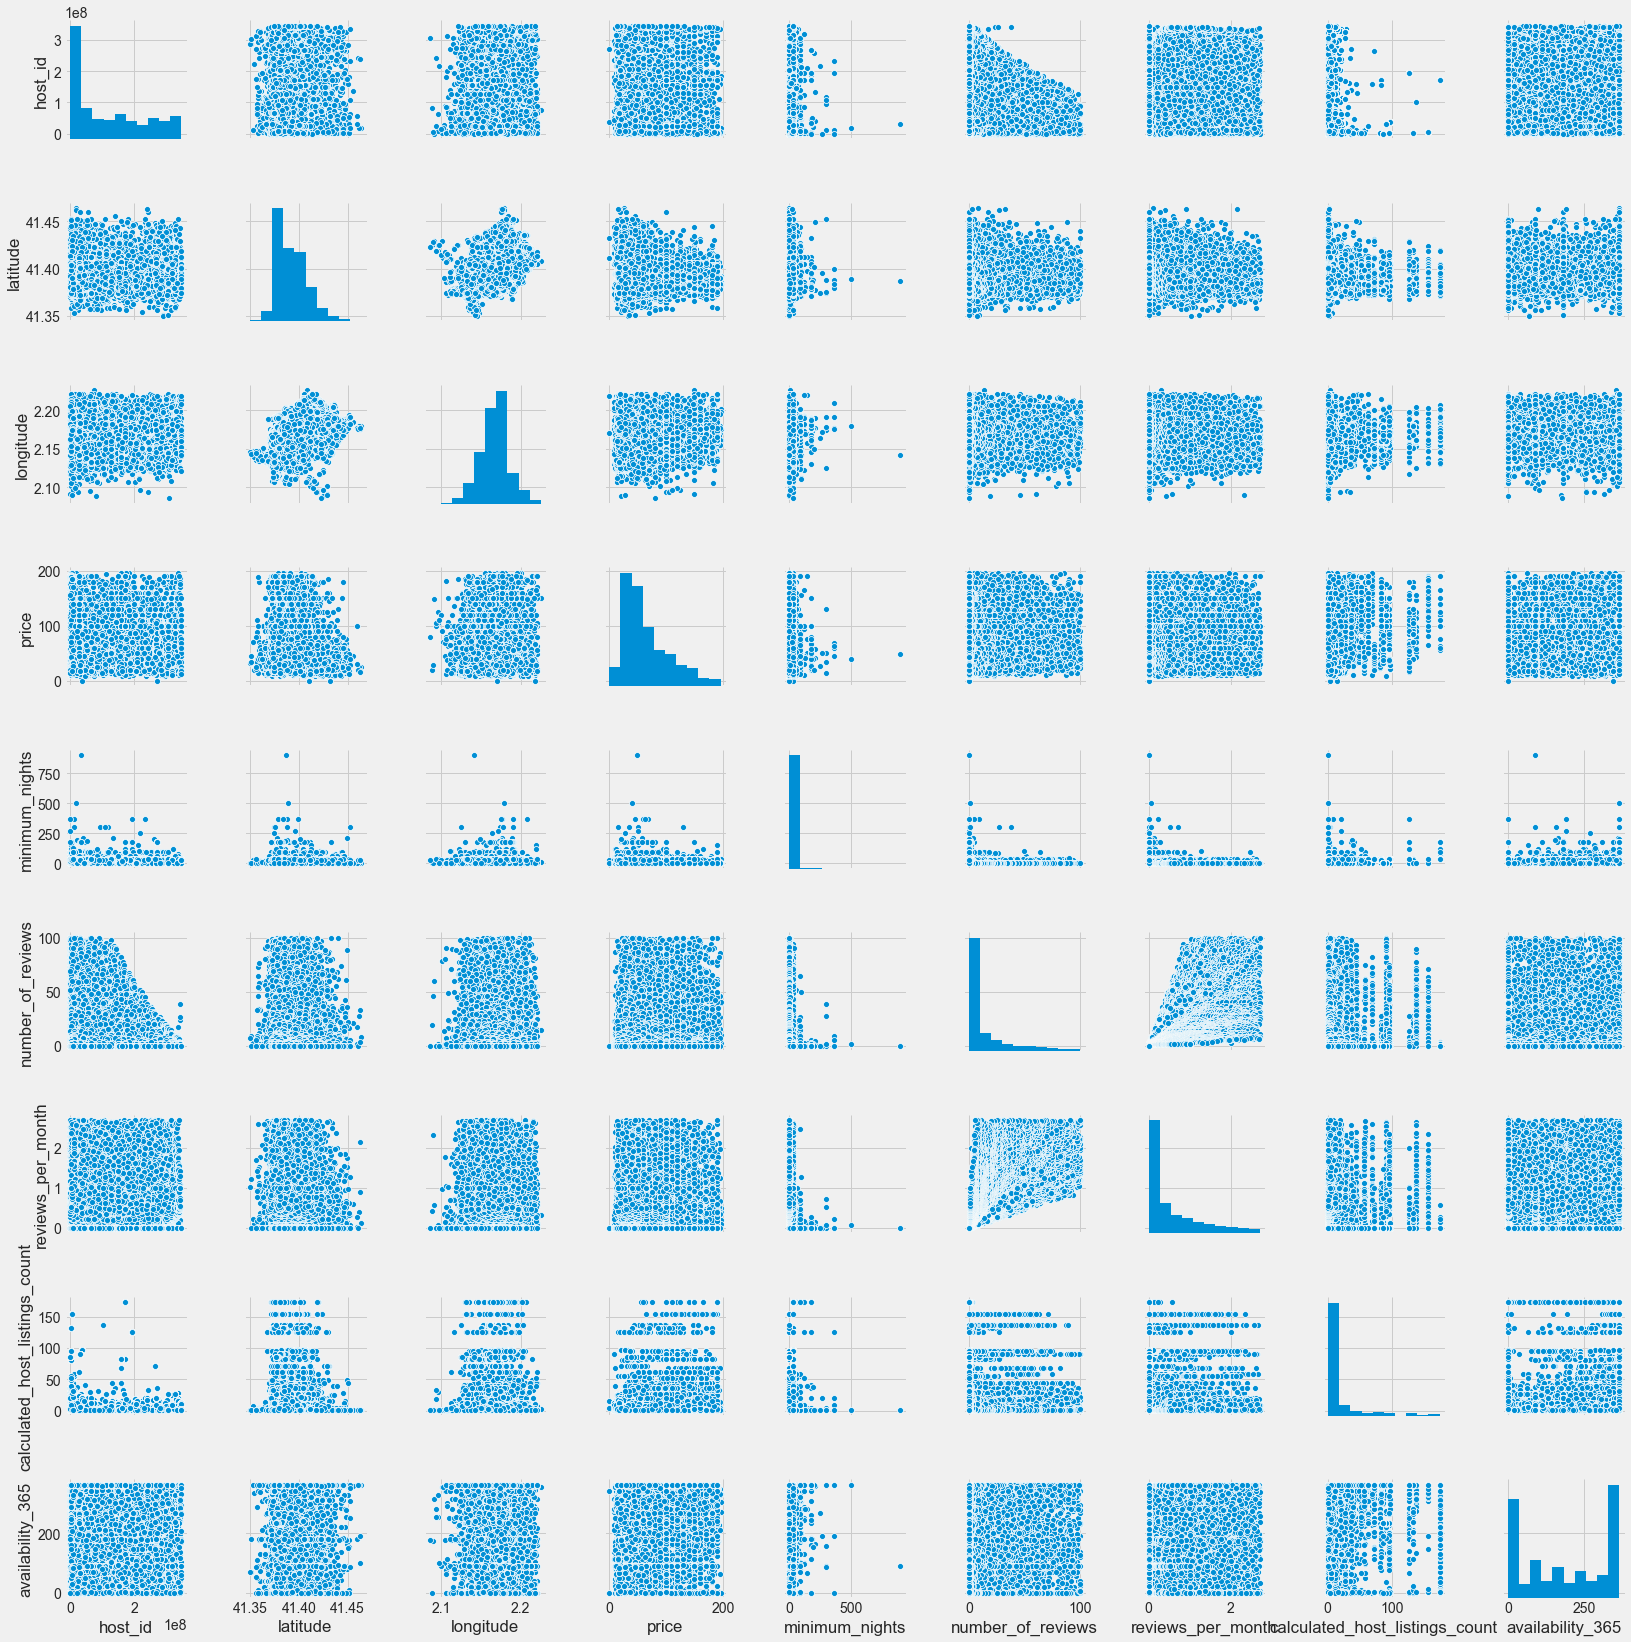

In [288]:
sns.pairplot(clean_sum_listings)

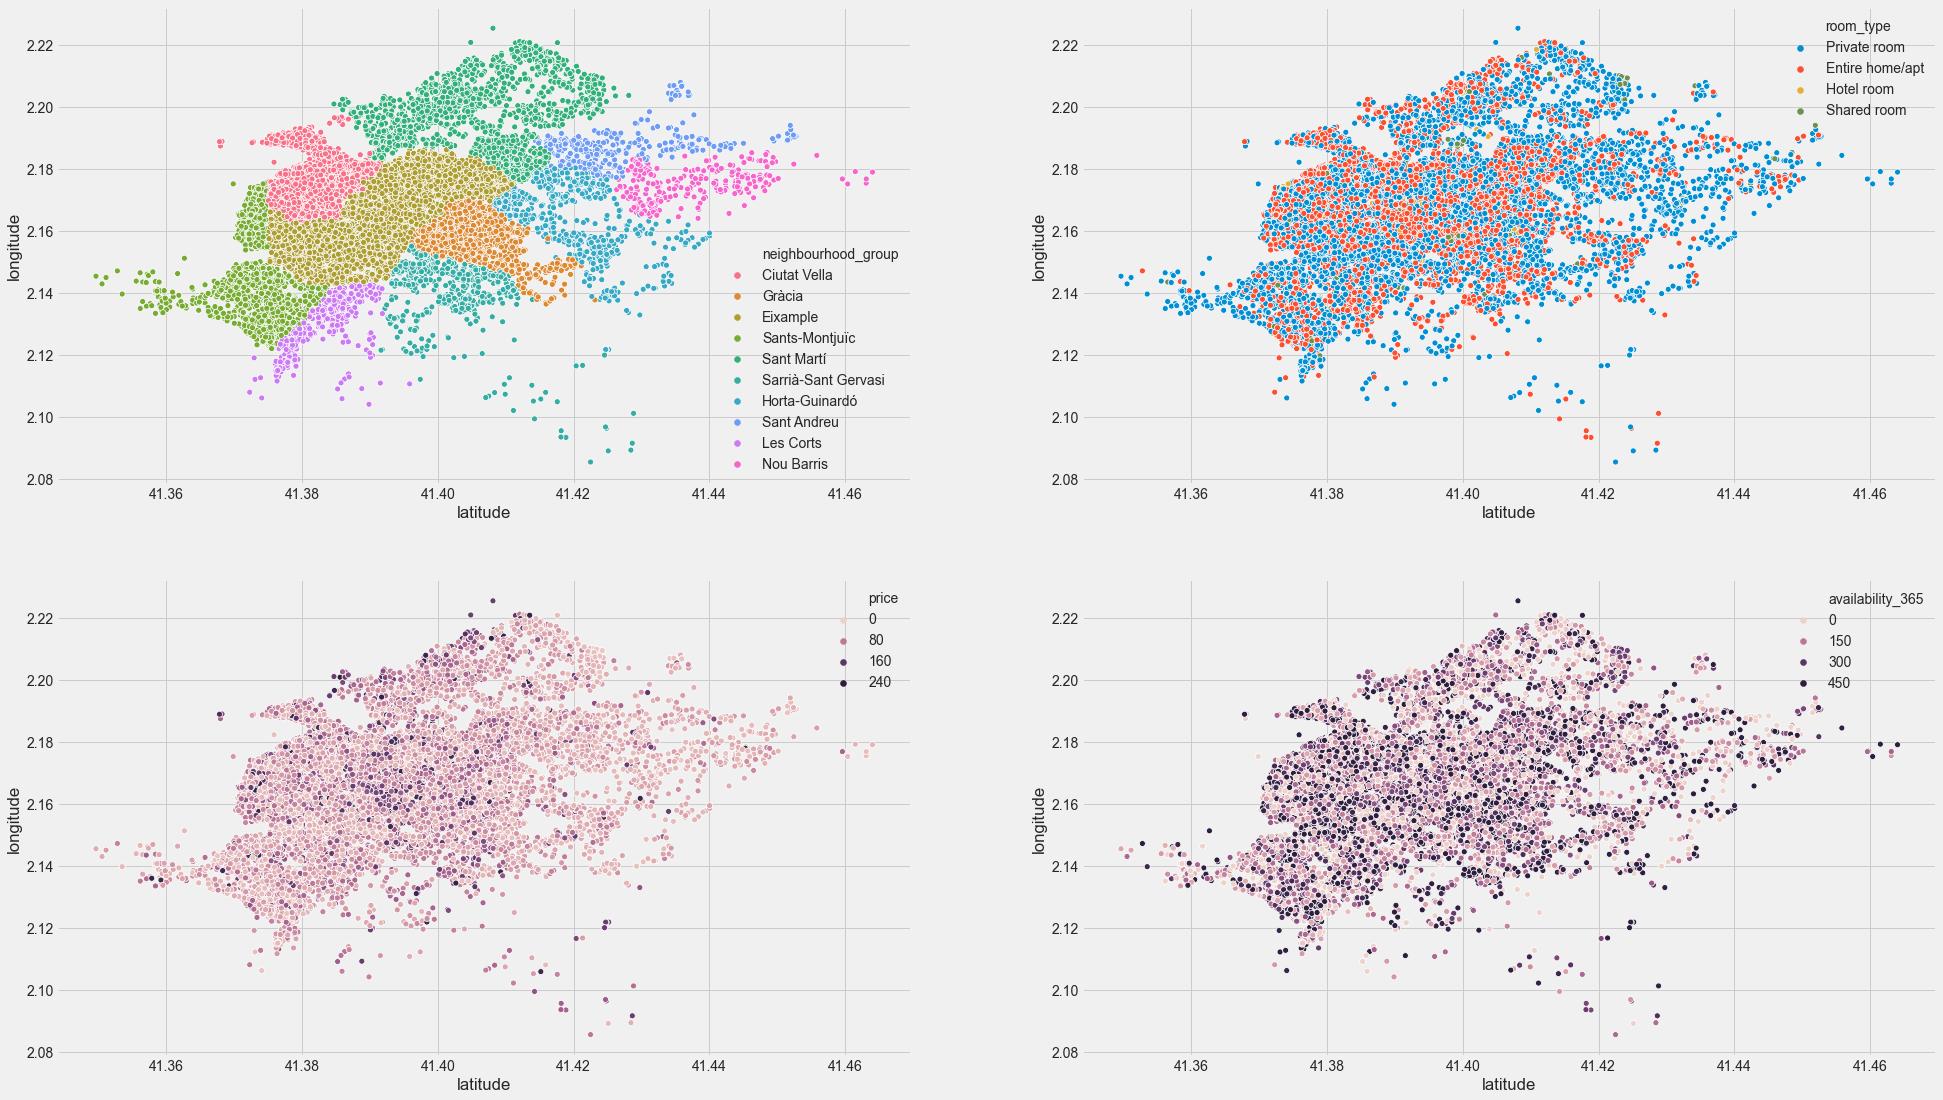

In [289]:
plt.figure(figsize = (30, 18))

plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=clean_sum_listings)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=clean_sum_listings)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=clean_sum_listings)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=clean_sum_listings)

In [277]:
nl = pd.read_csv('/Users/Dinis/Desktop/nl_calendar.csv')

In [278]:
nl.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96048,2020-05-09,t,$123.00,$123.00,2.0,365.0
1,97221,2020-05-09,t,$70.00,$70.00,2.0,8.0
2,97221,2020-05-10,t,$70.00,$70.00,2.0,8.0
3,97221,2020-05-11,t,$70.00,$70.00,2.0,8.0
4,97221,2020-05-12,t,$70.00,$70.00,2.0,8.0


In [279]:
nl_l = pd.read_csv('/Users/Dinis/Desktop/nl_listings.csv')

In [280]:
nl_l2 = pd.read_csv('/Users/Dinis/Desktop/nl_listings_2.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [283]:
nl_l.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.05,1,157
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.74,2,112
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287
